<a href="https://colab.research.google.com/github/joshuansu0897/NN_Examples/blob/main/clasificacion_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters

**Descargamos el data para entrenar**

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10_000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
word_index = reuters.get_word_index()

550378/550378 [==============================] - 0s 0us/step


In [4]:
word_index = dict([(value, key) for (key, value) in word_index.items()])

In [5]:
def vectorizar(sequences, dim=10_000):
  results = np.zeros((len(sequences), dim))
  for i, sequences in enumerate(sequences):
    results[i,sequences] = 1
  return results

**Convertimos el data**

In [6]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [7]:
from keras.utils import to_categorical

In [8]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

**Creamos nuestro modelo**

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10_000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy'
    ]
)

**Creamos los datos de validacion**

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [22]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/9
16/16 [==============================] - 1s 28ms/step - loss: 2.6432 - accuracy: 0.4944 - val_loss: 1.7360 - val_accuracy: 0.6560
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.4002 - accuracy: 0.7161 - val_loss: 1.2824 - val_accuracy: 0.7160
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.0322 - accuracy: 0.7756 - val_loss: 1.1557 - val_accuracy: 0.7410
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.8249 - accuracy: 0.8211 - val_loss: 1.0302 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6618 - accuracy: 0.8576 - val_loss: 0.9686 - val_accuracy: 0.7790
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 0.5317 - accuracy: 0.8875 - val_loss: 0.9210 - val_accuracy: 0.8020
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4324 - accuracy: 0.9077 - val_loss: 0.8894 - val_accuracy: 0.8120
Epoch 8/9
16/16 [===

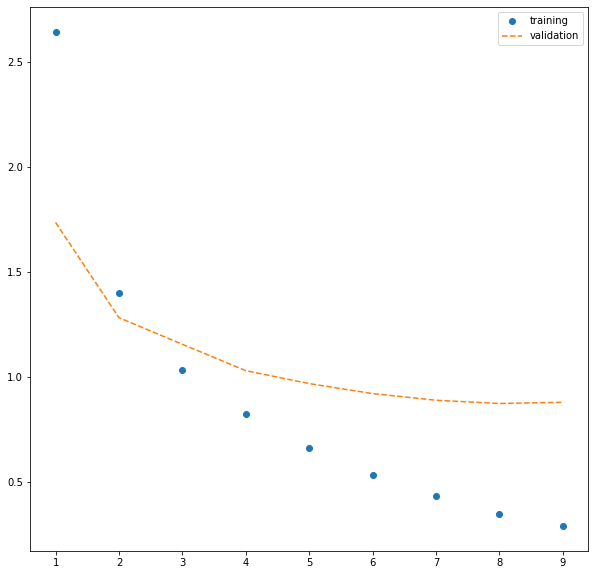

In [23]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10, 10))
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

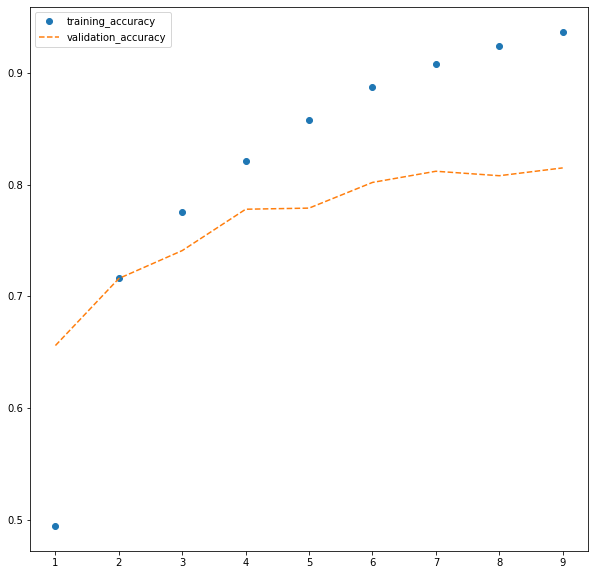

In [24]:
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

fig = plt.figure(figsize=(10, 10))
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, accuracy_values, 'o', label = 'training_accuracy')
plt.plot(epoch, val_accuracy_values, '--', label = 'validation_accuracy')
plt.legend()
plt.show()

In [25]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9945 - accuracy: 0.7832


[0.9945283532142639, 0.7831701040267944]

In [26]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [47]:
model2 = models.Sequential()
model2.add(layers.Dense(65, activation='relu', input_shape=(10_000,)))
model2.add(layers.Dropout(0.75))
model2.add(layers.Dense(65, activation='relu'))
model2.add(layers.Dropout(0.25))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy'
    ]  
)

history2 = model2.fit(
    partial_x_train,
    partial_y_train,
    epochs=25,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/25
16/16 [==============================] - 1s 27ms/step - loss: 3.0731 - accuracy: 0.3470 - val_loss: 2.0953 - val_accuracy: 0.5560
Epoch 2/25
16/16 [==============================] - 0s 17ms/step - loss: 2.1059 - accuracy: 0.5232 - val_loss: 1.6642 - val_accuracy: 0.6230
Epoch 3/25
16/16 [==============================] - 0s 19ms/step - loss: 1.7880 - accuracy: 0.5723 - val_loss: 1.4915 - val_accuracy: 0.6560
Epoch 4/25
16/16 [==============================] - 0s 17ms/step - loss: 1.6453 - accuracy: 0.6060 - val_loss: 1.4028 - val_accuracy: 0.6950
Epoch 5/25
16/16 [==============================] - 0s 17ms/step - loss: 1.5179 - accuracy: 0.6315 - val_loss: 1.3320 - val_accuracy: 0.7010
Epoch 6/25
16/16 [==============================] - 0s 16ms/step - loss: 1.4470 - accuracy: 0.6520 - val_loss: 1.2792 - val_accuracy: 0.7080
Epoch 7/25
16/16 [==============================] - 0s 16ms/step - loss: 1.3834 - accuracy: 0.6637 - val_loss: 1.2389 - val_accuracy: 0.7130
Epoch 8/25
16

In [50]:
model2.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.1730 - accuracy: 0.7578


[1.172961711883545, 0.7577916383743286]

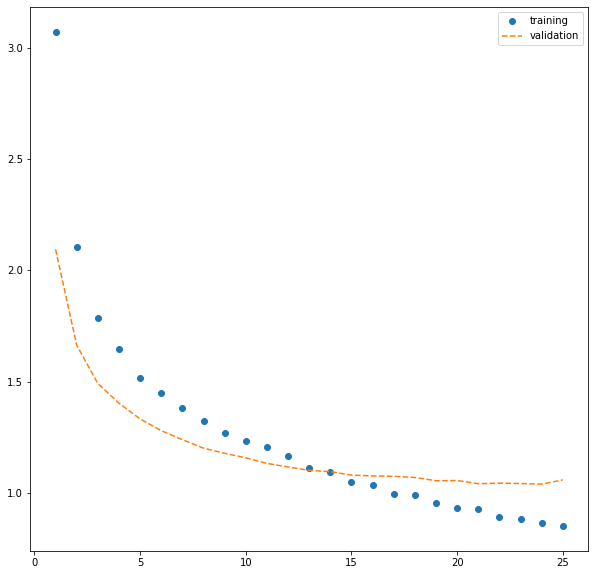

In [52]:
loss_values2 = history2.history['loss']
val_loss_values2 = history2.history['val_loss']

fig = plt.figure(figsize=(10, 10))
epoch = range(1, len(loss_values2) + 1)
plt.plot(epoch, loss_values2, 'o', label = 'training')
plt.plot(epoch, val_loss_values2, '--', label = 'validation')
plt.legend()
plt.show()

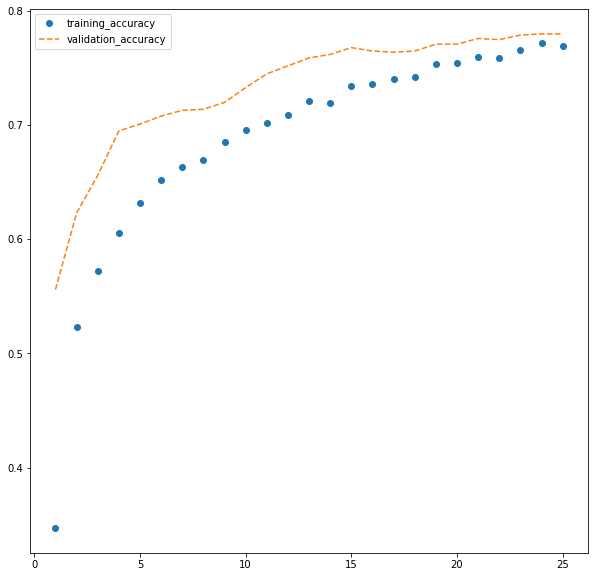

In [51]:
accuracy_values2 = history2.history['accuracy']
val_accuracy_values2 = history2.history['val_accuracy']

fig = plt.figure(figsize=(10, 10))
epoch = range(1, len(loss_values2) + 1)
plt.plot(epoch, accuracy_values2, 'o', label = 'training_accuracy')
plt.plot(epoch, val_accuracy_values2, '--', label = 'validation_accuracy')
plt.legend()
plt.show()